In [9]:
#Regressão com KNN
import numpy as np
import math
from matplotlib import pyplot as plt

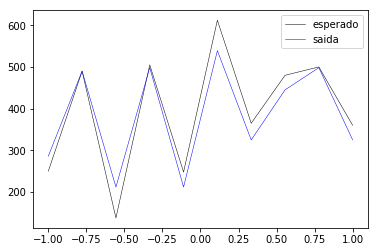

In [22]:
class KNNRegression:
    
    def __init__(self, x_treino, y_treino, K=3):
        #Variaveis de instancia
        self.n_amostras = len(x_treino)
        self.n_attrs = len(x_treino[0])
        self.K, self.x_treino, self.y_treino = K, x_treino, y_treino
    
    def predict(self, entrada):
        #predicao
        d = {} #dict para armazenar o índice e a distância e cada ponto
        
        for i in range(self.n_amostras):
            soma = 0
            for j in range(self.n_attrs):
                soma += math.pow(entrada[j] - self.x_treino[i][j], 2)
            d[i] = math.sqrt(soma)
        k_vizinhos = sorted(d, key = d.get)[:self.K]
        soma = np.sum([self.y_treino[indice] for indice in k_vizinhos])
        return soma/self.K
            
        
    
if __name__ == '__main__':
    #Método principal
    entradas = [[2,50], [4,90], [1,38,], [5,105], [2,48], [6,120], [3,65], [4,80], [5,100], [3,60]]
    saidas = [250, 490, 138, 505, 248, 612, 365, 480, 500, 360]

    knn = KNNRegression(entradas, saidas, 3)

    resultado = []
    for entrada in entradas:
        resultado.append(knn.predict(entrada))

    plt.plot(np.linspace(-1,1,10), saidas, label='esperado', color='black', linewidth='0.5')
    plt.plot(np.linspace(-1,1,10), resultado, label='saida', color='blue', linewidth='0.5')
    plt.legend()
    plt.show()